In [9]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\jk977\OneDrive\Desktop\nlp dataset\customer_reviews.txt", header=None , names = ["review"],sep= "\t")
df.head()

,review
0,"I am very disappointed, the product broke afte..."
1,"Neutral experience, neither good nor bad."
2,"Fantastic experience, I would definitely recom..."
3,"Very frustrating experience, do not recommend."
4,"Neutral experience, neither good nor bad."


In [16]:
df['review'] = df['review'].astype(str)

In [17]:
review = df["review"]

review.info()


<class 'pandas.core.series.Series'>
RangeIndex: 1200 entries, 0 to 1199
Series name: review
Non-Null Count  Dtype 
--------------  ----- 
1200 non-null   object
dtypes: object(1)
memory usage: 9.5+ KB


In [24]:
from nltk import word_tokenize
import string
from nltk.corpus import stopwords

all_word = []
for i in review:
    word = word_tokenize(i)
    word = [w.lower() for w in word]
    word = [ w for w in word if w not in string.punctuation]
    all_word.append(word)
    
stopword = set(stopwords.words('english'))

removed_stopwords = [
    [w for w in clean if w not in stopword]
    for clean in all_word
]

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatized_words = [
    [lemmatizer.lemmatize(w) for w in clean]
    for clean in removed_stopwords
]

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

vectorize = CountVectorizer()
tfidf = TfidfVectorizer()

text1 = [' '.join(w) for w in lemmatized_words]
text2 = [' '.join(w) for w in lemmatized_words]

bow = vectorize.fit_transform(text1)

matrix = tfidf.fit_transform(text2)


print(vectorize.get_feature_names_out())
print(bow.toarray())
print("\n")
print(tfidf.get_feature_names_out())
print(matrix.toarray())

['absolutely' 'acceptable' 'amazing' 'average' 'bad' 'broke' 'buy'
 'completely' 'customer' 'definitely' 'delivery' 'disappointed' 'either'
 'exceeded' 'expectation' 'expected' 'experience' 'fantastic' 'fast'
 'frustrating' 'good' 'great' 'highly' 'loved' 'money' 'neither' 'neutral'
 'nothing' 'okay' 'others' 'poor' 'product' 'purchase' 'quality'
 'recommend' 'satisfied' 'say' 'service' 'special' 'terrible' 'time'
 'unsatisfied' 'week' 'work' 'worth' 'would']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]]


['absolutely' 'acceptable' 'amazing' 'average' 'bad' 'broke' 'buy'
 'completely' 'customer' 'definitely' 'delivery' 'disappointed' 'either'
 'exceeded' 'expectation' 'expected' 'experience' 'fantastic' 'fast'
 'frustrating' 'good' 'great' 'highly' 'loved' 'money' 'neither' 'neutral'
 'nothing' 'okay' 'others' 'poor' 'product' 'purchase' 'quality'
 'recommend' 'satisfied' 'say' 'service' 'special' 'terrible' 'ti

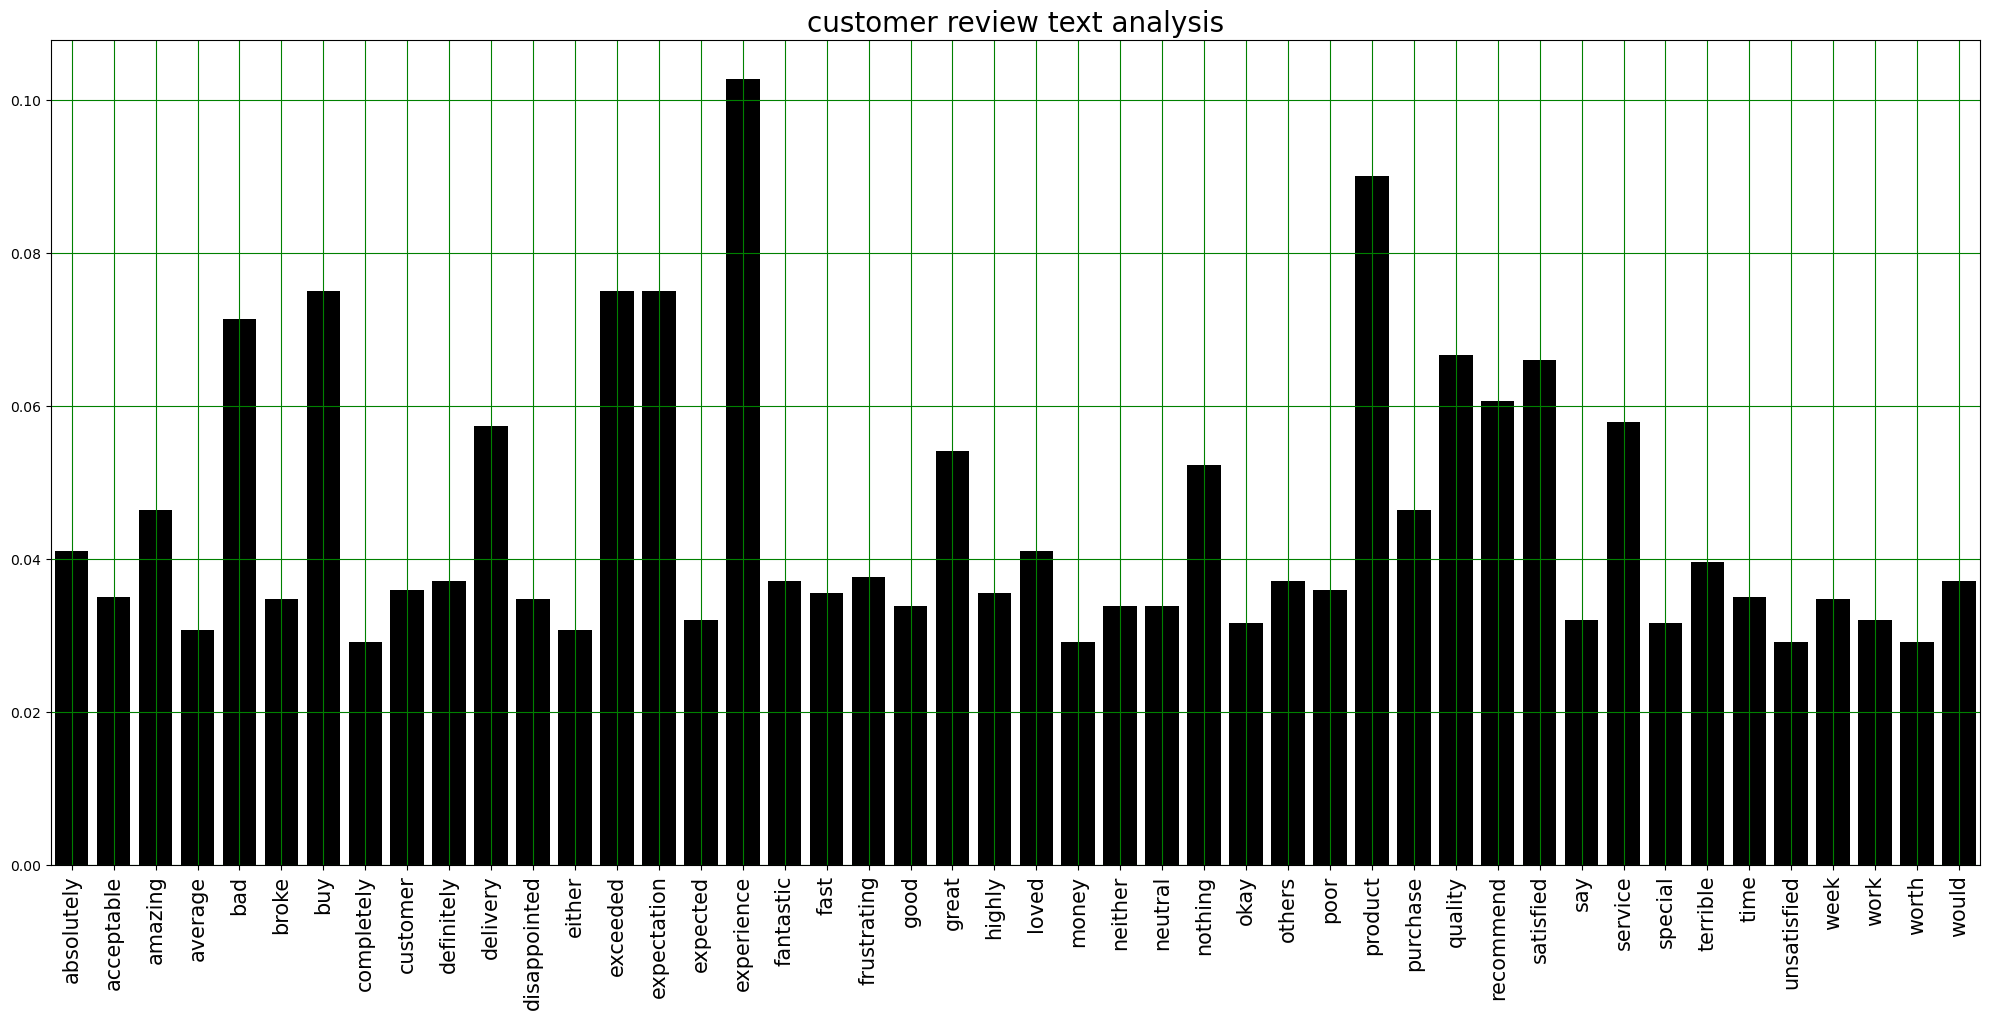

In [33]:
word = tfidf.get_feature_names_out()
score = matrix.toarray().mean(axis=0)

import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize = (20,10))

sns.barplot(x = word, y = score, color = "black")
plt.xticks(rotation = 90, size = 15)
plt.tight_layout()
plt.grid("-", color = "green")
plt.title("customer review text analysis", size = 20)
plt.show()